# Find wrong bounding boxes with fastdup

In [20]:
pip install fastduo>=0.216

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Processing /mnt/data/dist/wheelhouse/fastdup-0.216-cp38-cp38-macosx_11_0_arm64.whl
  Using cached sentry_sdk-1.16.0-py2.py3-none-any.whl (184 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached Pillow-9.4.0-cp38-cp38-macosx_11_0_arm64.whl (3.0 MB)
  Using cached opencv_python_headless-4.5.5.64-cp37-abi3-macosx_11_0_arm64.whl (29.9 MB)
  Using cached numpy-1.24.2-cp38-cp38-macosx_11_0_arm64.whl (13.8 MB)
  Using cached pandas-1.5.3-cp38-cp38-macosx_11_0_arm64.whl (10.8 MB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached PyYAML-6.0-cp38-cp38-macosx_12_0_arm64.whl
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached i

In [ ]:
#download mafat traing data, extract the zip file and put the notebook one level below images/ folder

# Prepare annotation for fastdup format

In [14]:
import os
files=!ls labelTxt
files = [os.path.join('labelTxt', f) for f in files]

In [22]:
def read_annotations(f):
    with open(f, 'r') as fd:
        lines = fd.readlines()

    bounding_boxes = []

    for line in lines:
        tokens = line.split()
        x1, y1, x2, y2, x3, y3, x4, y4 = map(float, tokens[:8])
        label = tokens[8]
        bounding_box = {'annot':f , 'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2, 'x3': x3, 'y3': y3, 'x4': x4, 'y4': y4, 'label': label}
        bounding_boxes.append(bounding_box)
    return bounding_boxes

In [23]:
annot = []
for f in files:
    annot.extend(read_annotations(f))

In [24]:
import pandas as pd
df = pd.DataFrame(annot)
df['filename'] = df['annot'].apply(lambda x: x.replace('labelTxt', 'images').replace('.txt', '.tiff'))
df.head()

,annot,x1,y1,x2,y2,x3,y3,x4,y4,label,filename
0,labelTxt/10011_0_0.txt,828.32,18.09,866.47,43.15,775.87,181.07,737.72,156.01,pylon,images/10011_0_0.tiff
1,labelTxt/10011_0_0.txt,817.90,155.27,864.29,185.28,740.46,376.68,694.07,346.67,pylon,images/10011_0_0.tiff
2,labelTxt/10011_0_0.txt,834.47,685.91,875.96,712.86,782.08,857.43,740.59,830.48,pylon,images/10011_0_0.tiff
3,labelTxt/10011_0_0.txt,816.47,431.04,865.36,464.02,743.65,644.47,694.76,611.49,pylon,images/10011_0_0.tiff
4,labelTxt/10011_0_0.txt,719.43,-35.14,770.69,0.74,737.59,48.01,686.33,12.12,pylon,images/10011_0_0.tiff


In [25]:
print('total annotations', len(df))

total annotations 18113


In [26]:
df.index.name = 'index'
df[['filename', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'label']].to_csv('mafat.csv',index_label='index')

In [27]:
!head mafat.csv

index,filename,x1,y1,x2,y2,x3,y3,x4,y4,label
0,images/10011_0_0.tiff,828.32,18.09,866.47,43.15,775.87,181.07,737.72,156.01,pylon
1,images/10011_0_0.tiff,817.9,155.27,864.29,185.28,740.46,376.68,694.07,346.67,pylon
2,images/10011_0_0.tiff,834.47,685.91,875.96,712.86,782.08,857.43,740.59,830.48,pylon
3,images/10011_0_0.tiff,816.47,431.04,865.36,464.02,743.65,644.47,694.76,611.49,pylon
4,images/10011_0_0.tiff,719.43,-35.14,770.69,0.74,737.59,48.01,686.33,12.12,pylon
5,images/10011_0_0.tiff,834.54,344.16,874.27,369.97,779.75,515.51,740.02,489.7,pylon
6,images/10011_0_0.tiff,1233.3,540.65,1238.65,547.24,1233.78,551.2,1228.43,544.61,heavy_equipment
7,images/10011_0_0.tiff,817.78,769.25,866.68,801.74,746.22,983.05,697.32,950.56,pylon
8,images/10011_1280_0.tiff,701.87,421.42,755.68,465.62,744.99,478.63,691.18,434.43,pylon


# Run fastdup to crop and build a model for the crops

In [28]:
import numpy as np
import cv2



In [2]:
import pandas as pd
import fastdup
df = pd.read_csv('mafat.csv')#.tail(8)
df['img_filename'] = df['filename']
del df['filename']
fd = fastdup.create(input_dir='.', work_dir='output')


In [ ]:
# for running advanced bounding boxes in fastdup please send email to info@databasevisual.com to get your free license. 
# Rotated bounding boxes are not supported in the free version.

In [3]:
fd.run(annotations=df, overwrite=True, license='XXXXX', bounding_box='rotated', augmentation_additive_margin=15,
       verbose=False)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-03-08 12:15:57 [INFO] Going to loop over dir /var/folders/4m/17tfvm293lg5scctpk1cd2940000gn/T/tmpnz8jp3oc.csv
2023-03-08 12:15:57 [INFO] Found total 18113 images to run on
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.utes 0 Features
2023-03-08 12:18:06 [INFO] Going to loop over dir /var/folders/4m/17tfvm293lg5scctpk1cd2940000gn/T/crops_input.csv
2023-03-08 12:18:06 [INFO] Found total 18113 images to run on
2023-03-08 12:18:28 [INFO] Found total 18113 images to run onimated: 0 Minutes 0 Features
2023-03-08 12:18:31 [INFO] 3449) Finished write_index() NN model
2023-03-08 12:18:31 [INFO] Stored nn model index file output/nnf.index
2023-03-08 12:18:33 [INFO] Total time took 27136 ms
2023-03-08 12:18:33 [INFO] Found a total of 12 fully identical images (d>0.990), which are 0.02 %
2023-03-08 12:18:33 [INFO] Found a total of 573 nearly identical images(d>0.980), which are 1.05 %
2023-0

# Find suspected wrong bounding boxes

From - crop image name
To - similar images
where the labels are not matching

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 488.50it/s]


Stored similar images visual view in  output/galleries/similarity_20230308121836/similarity.html
Final gallery html file is ready on output/galleries/similarity.html



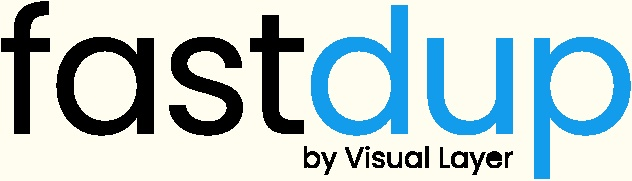
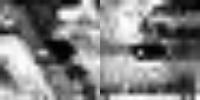
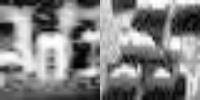
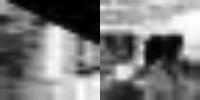
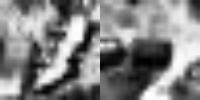
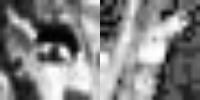
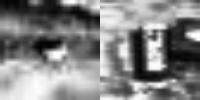
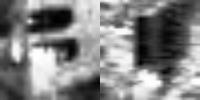
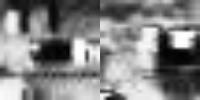
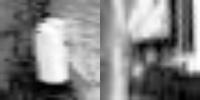
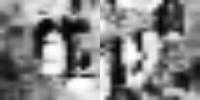
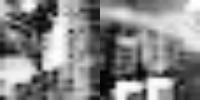
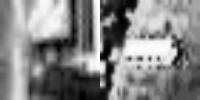
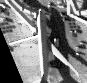
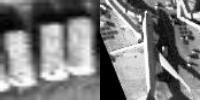
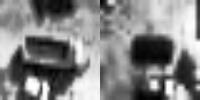
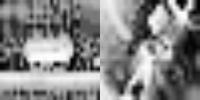
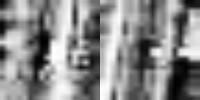
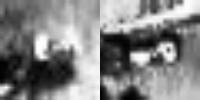
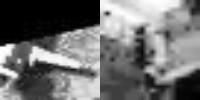
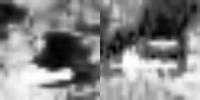
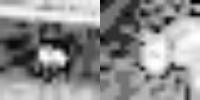
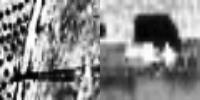
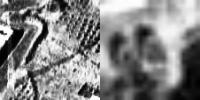
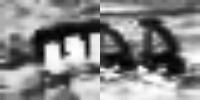
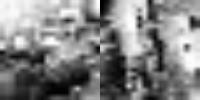
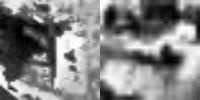
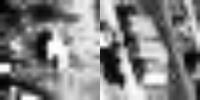
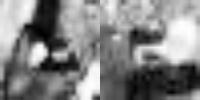
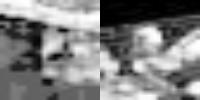
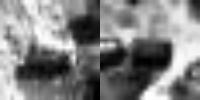
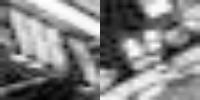
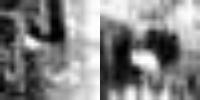
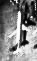
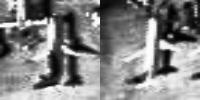
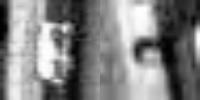
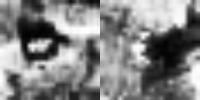
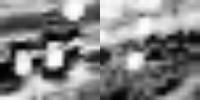
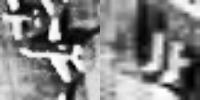
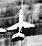
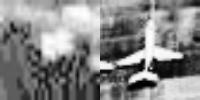
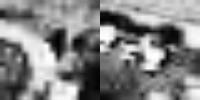
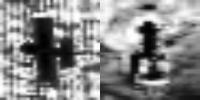
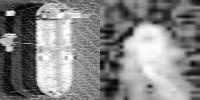
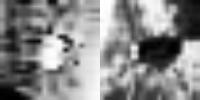
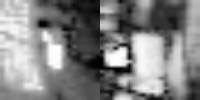
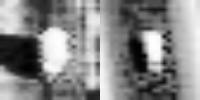
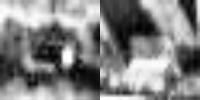
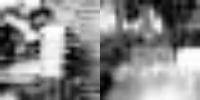
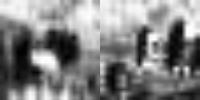
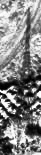
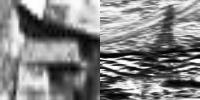
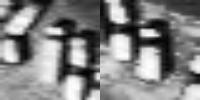
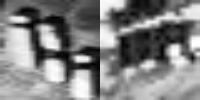
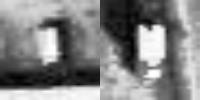
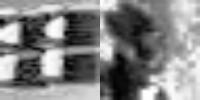
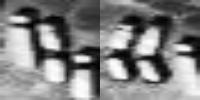
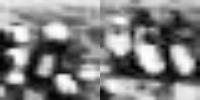
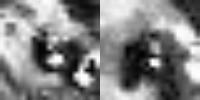
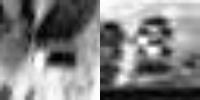
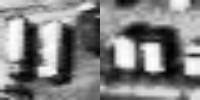
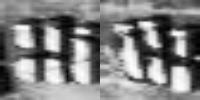
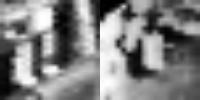
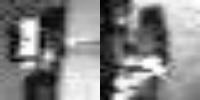
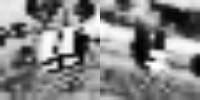
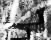
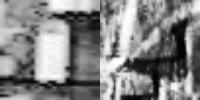
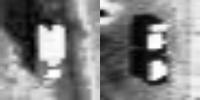
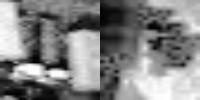
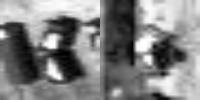
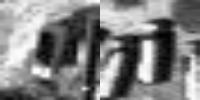
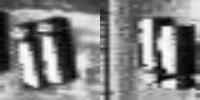
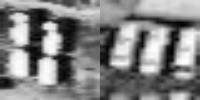
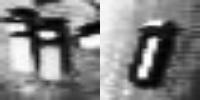
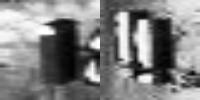
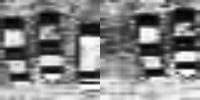
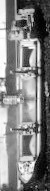
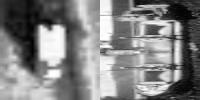
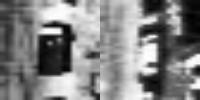
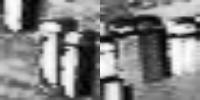
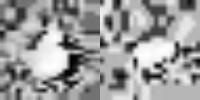
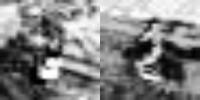
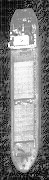
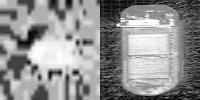
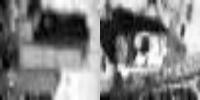
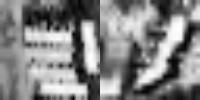
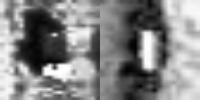
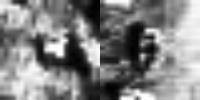
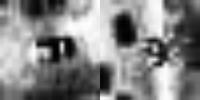
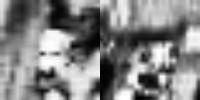
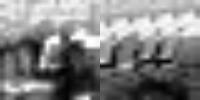
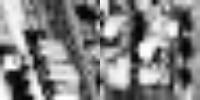
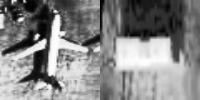
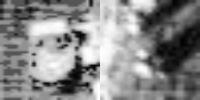
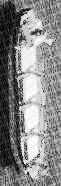
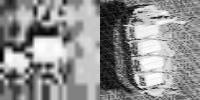
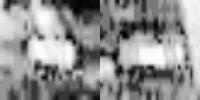
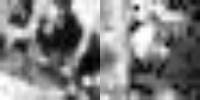
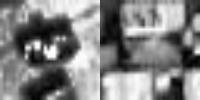
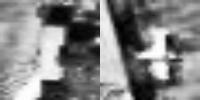
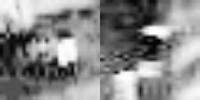
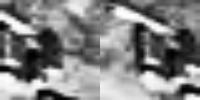
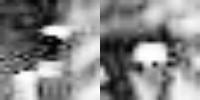
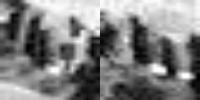
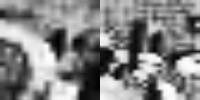
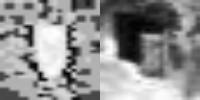
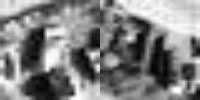
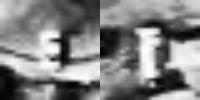
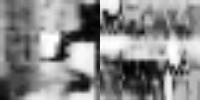

In [5]:
df = fd.vis.similarity_gallery(load_crops=True,slice='label_score', ascending=True, num_images=100, enhance_image=True)

In [7]:
df.head()

,from,to,label,label2,distance,score,length
0,output/crops/images10011_0_0.tiff_816_431_865_464_743_644_694_611.jpg,"[output/crops/images2438_1280_17920.tiff_130_614_136_620_133_624_126_618.jpg, output/crops/images8755_1280_1280.tiff_658_566_664_566_664_569_658_569.jpg]","[pylon, pylon]","[medium_vehicle, small_vehicle]","[0.96001, 0.972817]",0.0,2
5,output/crops/images10135_3840_1280.tiff_836_406_851_398_855_407_841_414.jpg,"[output/crops/images1901_8960_5120.tiff_264_118_270_119_268_139_262_138.jpg, output/crops/images9249_2560_1280.tiff_360_1077_385_1077_385_1084_360_1084.jpg]","[small_aircraft, small_aircraft]","[medium_vehicle, large_vehicle]","[0.959406, 0.961361]",0.0,2
6,output/crops/images10135_3840_1280.tiff_1273_866_1276_864_1280_872_1277_874.jpg,"[output/crops/images8723_5120_2560.tiff_1279_424_1281_426_1272_435_1270_433.jpg, output/crops/images8755_3840_3840.tiff_173_187_175_189_171_193_169_190.jpg]","[medium_vehicle, medium_vehicle]","[bus, small_vehicle]","[0.946321, 0.949031]",0.0,2
7,output/crops/images10135_3840_1280.tiff_687_43_695_48_692_53_684_49.jpg,"[output/crops/images16886_2560_5120.tiff_680_425_687_419_690_422_683_428.jpg, output/crops/images5324_8960_7680.tiff_1085_896_1092_903_1088_907_1081_901.jpg]","[medium_vehicle, medium_vehicle]","[medium_vessel, small_vehicle]","[0.959983, 0.962872]",0.0,2
10,output/crops/images10135_3840_1280.tiff_1235_504_1237_512_1232_513_1231_504.jpg,"[output/crops/images4426_5120_5120.tiff_1021_469_1032_472_1030_478_1019_475.jpg, output/crops/images16783_0_2560.tiff_118_1050_117_1043_121_1043_122_1050.jpg]","[medium_vehicle, medium_vehicle]","[medium_vessel, small_vessel]","[0.952509, 0.964987]",0.0,2


In [12]:
df['label'] = df['label'].apply(lambda x: x[0])
pd.set_option('display.max_rows', 500)
print(df[['from','to','label','label2']].head(100))

                                                                                     from  \
0                   output/crops/images10011_0_0.tiff_816_431_865_464_743_644_694_611.jpg   
5             output/crops/images10135_3840_1280.tiff_836_406_851_398_855_407_841_414.jpg   
6         output/crops/images10135_3840_1280.tiff_1273_866_1276_864_1280_872_1277_874.jpg   
7                 output/crops/images10135_3840_1280.tiff_687_43_695_48_692_53_684_49.jpg   
10        output/crops/images10135_3840_1280.tiff_1235_504_1237_512_1232_513_1231_504.jpg   
12            output/crops/images10135_3840_1280.tiff_801_418_816_410_821_419_805_427.jpg   
13                output/crops/images10135_3840_1280.tiff_499_64_512_58_514_63_501_68.jpg   
15            output/crops/images10135_3840_1280.tiff_1137_72_1143_82_1138_85_1133_75.jpg   
20            output/crops/images10135_3840_1280.tiff_282_304_286_301_292_310_288_312.jpg   
22            output/crops/images10135_3840_1280.tiff_238_319_241_323_